In [2]:
from bs4 import *
import requests
import sqlite3
import nltk

In [4]:
def site_text(url):
    try:
        r = requests.get(url,allow_redirects=True)
        soup = BeautifulSoup(r.text, 'html.parser')
        text = soup.get_text().split()
        all_text = []
        for word in text:
            all_text += [word.lower()]
        
        return all_text
    except:
        return ''

def result_of_search(url,word):
    try:
        all_text = site_text(url)
        all_text_keyword = nltk.FreqDist(all_text)

        total_page_keyword = all_text_keyword[word]

        #print("result of search")
        return [url,total_page_keyword]
    except:
        return ''



In [5]:
def links(url):
    try:
        response = requests.get(url,allow_redirects=True)
        soup = BeautifulSoup(response.text,'html.parser')
        padrao = url
        if  response.status_code >= 400:
            return ''
        else:

            l = soup.find_all('a')
            clear_link = []
            for link in l:
                if link.get('href') == None:
                    pass
                elif "#" in link.get('href'):
                    pass
                else:
                    clear_link += [link.get('href')]

            links = []
            for link in clear_link:
                if 'http' in link:
                    links += [link]
                else:
                    links += [url + link]


            return links
    except:
        return ''

#links('https://pt.wikipedia.org/wiki/Pixel_art')


In [6]:
banco_dados = {}
try:
    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE sites (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            url TEXT NOT NULL,
            freq INTEGER,
            keyword TEXT NOT NULL);""")
    conn.close()
except:
    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()

    cursor.execute("""
    SELECT url,freq,keyword FROM sites;
    """)

    for linha in cursor.fetchall():
        banco_dados[linha[0]] = linha[1]
    
    conn.commit()
    conn.close()


In [7]:
def upar(keyword):
    banco = {}
    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()

    cursor.execute("""
    SELECT url,freq FROM sites;
    """)

    for linha in cursor.fetchall():
        banco[linha[0]] = linha[1]

    conn.commit()
    conn.close()
    ###########################################################################
    adicionar = {}
    for key in banco_dados.keys():
        if key not in banco.keys():
            adicionar[key] = banco_dados[key]


    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()
    for key in adicionar.keys():
        cursor.execute("""
        INSERT INTO sites (url, freq,keyword)
        VALUES (?, ?, ?)""",(key,adicionar[key],keyword))
    conn.commit()
    conn.close()
    print("upado")

In [8]:
##########################  INIT #################################################################################

In [31]:
url = 'https://en.wikipedia.org/wiki/Pixel_art'
key = "pixel"

In [32]:
def search(keyword,url,depth):
    id = 0
    
    if url not in banco_dados.keys():
        print(result_of_search(url,keyword))
        banco_dados[result_of_search(url,keyword)[0]] = result_of_search(url,keyword)[1]
    else:
        pass
        
    id += 1
    if depth > 1:
        print('profundidade %d'%depth)

    if id < depth:
        page_links = links(url)
        print("links da pag: %d"%len(page_links))
        print('')

        for link in page_links:
            search(keyword,link,depth - id)

        


search(key,url,2)
print('busca terminada')
upar(key)


['https://en.wikipedia.org/wiki/Pixel_art', 56]
profundidade 2
links da pag: 226

[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/File:Nuvola_apps_package_graphics.svg', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Wikipedia:WikiProject_Video_games', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Video_games_as_an_art_form', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Arthouse_game', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/The_Art_of_Video_Games', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Alternate_reality_game', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Video_game_art', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Non-game', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Machinima', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Interactive_movie', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Game_art_design', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Video_game_graphics', 5]
[u'https://en.wikipedia.org/wiki/Pi

[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Habbo', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Nintendo_DS', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Nintendo_3DS', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/PlayStation_Portable', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/PS_Vita', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Indie_gaming', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Hotline_Miami', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/FTL:_Faster_Than_Light', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/w/index.php?title=Pixel_art&action=edit&section=8', 2]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Deluxe_Paint', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Amiga', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Demoscene', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/GrafX2', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/GIMP', 5]
[u'https://en.wikipedia.org/wiki/Pixel_art/wiki/Paint_(softwar

In [33]:
import matplotlib.pyplot as plt

x = url.split('/')
url_default = x[2]
url_default

'en.wikipedia.org'

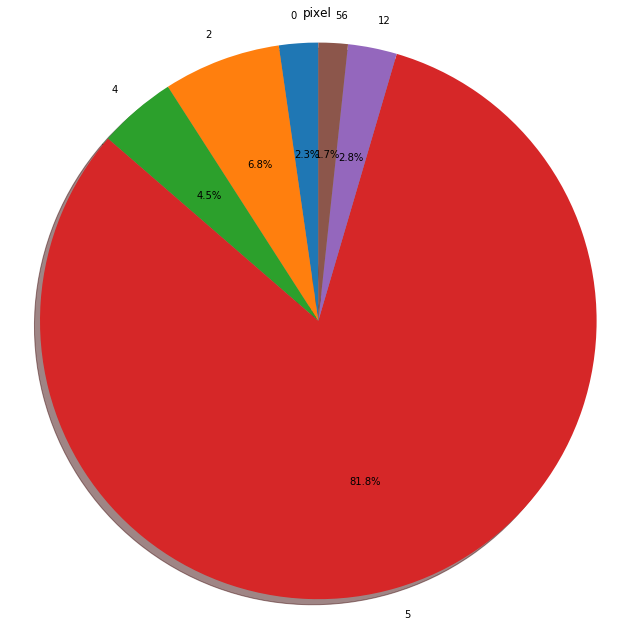

In [36]:
def graphic(url):
    dados = []
    key = ''
    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()

    # lendo os dados
    cursor.execute("""
    SELECT url,freq,keyword FROM sites;
    """)

    for linha in cursor.fetchall():
        if url_default in linha[0]:
            dados += [linha[1]]
            key = linha[2]
    conn.close()    
    return nltk.FreqDist(dados)


labels = graphic(url).keys()
size = []
for l in labels:
    size += [graphic(url)[l]]


fig1,ax1 = plt.subplots(figsize=(11,11))
ax1.pie(size, labels = labels, startangle = 90, autopct = '%1.1f%%',shadow = True)
plt.title(key)
ax1.axis('equal')


plt.show()

In [38]:
def busca(num):
    conn = sqlite3.connect('sites.db')
    cursor = conn.cursor()

    # lendo os dados
    cursor.execute("""
    SELECT url,freq,keyword FROM sites;
    """)

    for linha in cursor.fetchall():
        if linha[1] == num:
            print(linha[0])
    conn.close()
busca(5)

https://www.pixilart.com/
https://en.wikipedia.org/wiki/Pixel_art/wiki/Operating_system
https://en.wikipedia.org/wiki/Pixel_art/wiki/Deluxe_Paint
https://en.wikipedia.org/wiki/Pixel_art/wiki/Category:Articles_with_unsourced_statements_from_July_2019
https://en.wikipedia.org/wiki/Pixel_art/wiki/Bilinear_filtering
https://en.wikipedia.org/wiki/Pixel_art/wiki/GIMP
https://en.wikipedia.org/wiki/Pixel_art//shop.wikimedia.org
https://en.wikipedia.org/wiki/Pixel_art/wiki/Category:Articles_with_short_description
https://en.wikipedia.org/wiki/Pixel_art/wiki/File:Pixel-Art_Wohnhaus_Nr._6.gif
https://en.wikipedia.org/wiki/Pixel_art/wiki/Talk:Pixel_art
https://en.wikipedia.org/wiki/Pixel_art/wiki/Run-length_encoding
https://en.wikipedia.org/wiki/Pixel_art//foundation.wikimedia.org/wiki/Privacy_policy
https://en.wikipedia.org/wiki/Pixel_art/wiki/Alternate_reality_game
https://en.wikipedia.org/wiki/Pixel_art/wiki/Wikipedia:General_disclaimer
https://en.wikipedia.org/wiki/Pixel_art/wiki/EBoy
https://

In [50]:
'https://www.nuuvem.com/item/risk-of-rain-2'

'https://www.nuuvem.com/item/risk-of-rain-2'